# Crypto Predict EDA

In [1]:
# Required Packages:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load CSVs
df_16 = pd.read_csv("data/coin_gecko_2022-03-16.csv")
df_17 = pd.read_csv("data/coin_gecko_2022-03-17.csv")

# Combine both
df = pd.concat([df_16, df_17], ignore_index=True)

# first five rows
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [3]:
df.shape

(1000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          993 non-null    float64
 4   24h         993 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  993 non-null    float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [5]:
# change the date column to datetime
df["date"] = pd.to_datetime(df["date"])

In [6]:
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap,date
count,1.000000e+03,993.000000,993.000000,992.000000,9.930000e+02,1.000000e+03,1000
mean,6.561060e+02,0.009723,0.023737,0.023558,2.893109e+08,3.755304e+09,2022-03-16 12:00:00
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07,2022-03-16 00:00:00
25%,1.940547e-01,0.001000,0.001000,-0.041000,1.766976e+06,1.157776e+08,2022-03-16 00:00:00
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08,2022-03-16 12:00:00
75%,7.232500e+00,0.019000,0.035000,0.037000,4.003652e+07,5.948436e+08,2022-03-17 00:00:00
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11,2022-03-17 00:00:00
std,4.584655e+03,0.026934,0.059303,0.229781,2.769908e+09,3.803783e+10,NaN


In [7]:
# check for missing values
df.isnull().sum()

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

In [8]:
# Treat missing values
df['1h'].fillna(df['1h'].mean(), inplace=True)
df['24h'].fillna(df['24h'].mean(), inplace=True)
df['7d'].fillna(df['7d'].mean(), inplace=True)
df['24h_volume'].fillna(df['24h_volume'].mean(), inplace=True)

In [9]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

There is no duplicate data in the dataset. The dataset is clean and ready for analysis. 

## EDA

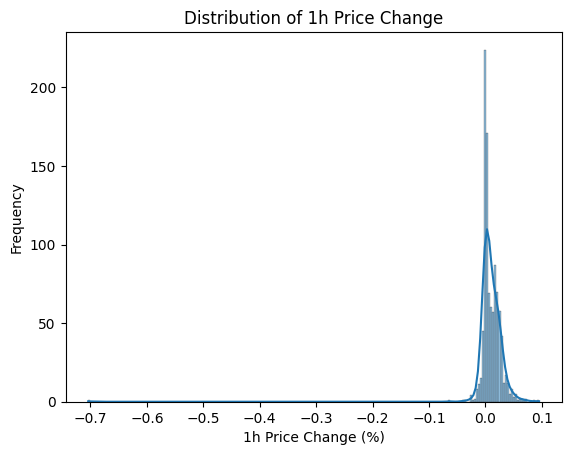

In [10]:
## Check the distribution of the '1h' column
sns.histplot(df['1h'], kde=True)
plt.title('Distribution of 1h Price Change')
plt.xlabel('1h Price Change (%)')
plt.ylabel('Frequency')
plt.show()

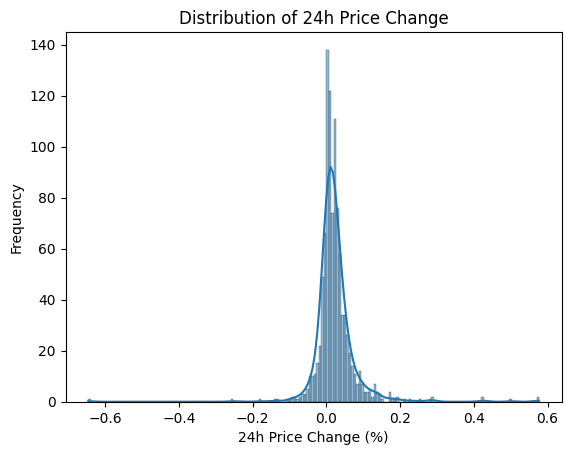

In [11]:
## Check the distribution of the '24h' column
sns.histplot(df['24h'], kde=True)
plt.title('Distribution of 24h Price Change')
plt.xlabel('24h Price Change (%)')
plt.ylabel('Frequency')
plt.show()

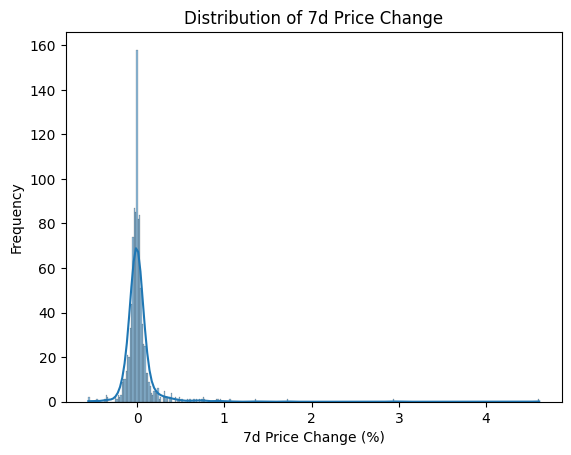

In [12]:
## Check the distribution of the '7d' column
sns.histplot(df['7d'], kde=True)
plt.title('Distribution of 7d Price Change')
plt.xlabel('7d Price Change (%)')
plt.ylabel('Frequency')
plt.show()

## feature engineering

In [13]:
# Calculate the liquidity score
df['liquidity_score'] = df['24h_volume'] / df['mkt_cap']

# Price change ratio
df['price_change_ratio'] = df['24h'] / df['price']

# Volume to price
df['volume_to_price'] = df['24h_volume'] / df['price']

# Stable coin feature
stable_coins = ['USDT', 'USDC', 'BUSD']
df['is_stable_coin'] = df['symbol'].apply(lambda x: 1 if x in stable_coins else 0)

In [14]:
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_score,price_change_ratio,volume_to_price,is_stable_coin
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,0.045903,7.342241e-07,8.661584e+05,0
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16,0.060374,1.238882e-05,7.195971e+06,0
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16,0.724503,-1.000000e-03,5.793497e+10,1
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16,0.021795,7.302506e-05,3.640440e+06,0
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16,0.074150,0.000000e+00,3.872762e+09,1


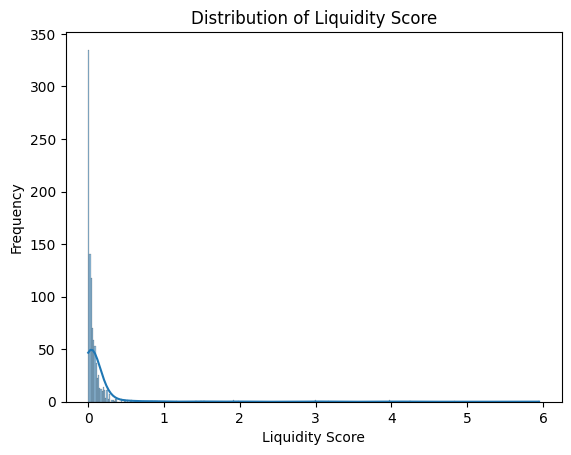

In [15]:
# Check the distribution of the liquidity score
sns.histplot(df['liquidity_score'], kde=True)
plt.title('Distribution of Liquidity Score')
plt.xlabel('Liquidity Score')
plt.ylabel('Frequency')
plt.show()

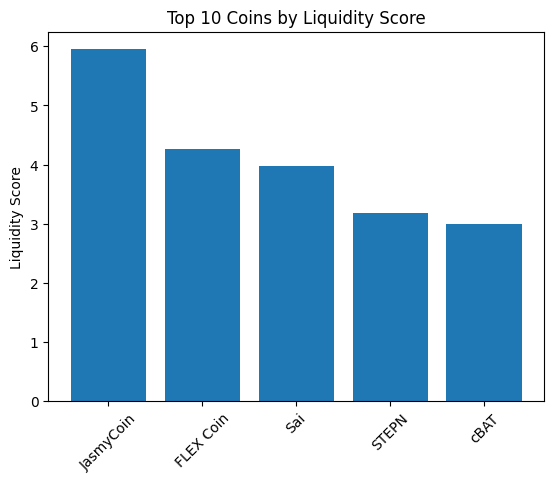

In [16]:
# Top 10 coins by liquidity
top_coins = df.sort_values('liquidity_score', ascending=False).head(10)

plt.bar(top_coins['coin'], top_coins['liquidity_score'])
plt.title("Top 10 Coins by Liquidity Score")
plt.xticks(rotation=45)
plt.ylabel("Liquidity Score")
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'liquidity_score']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

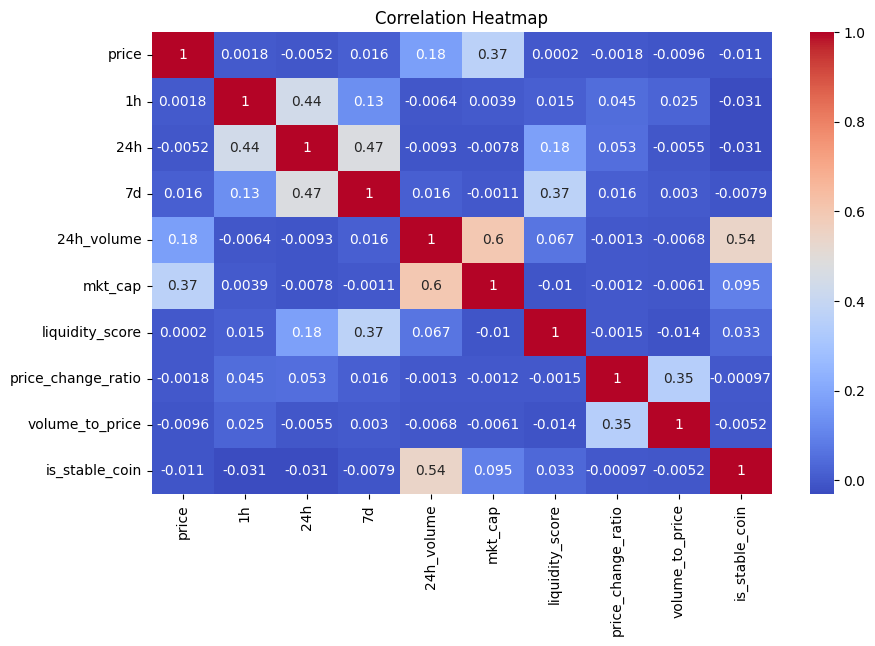

In [18]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
import seaborn as sns

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

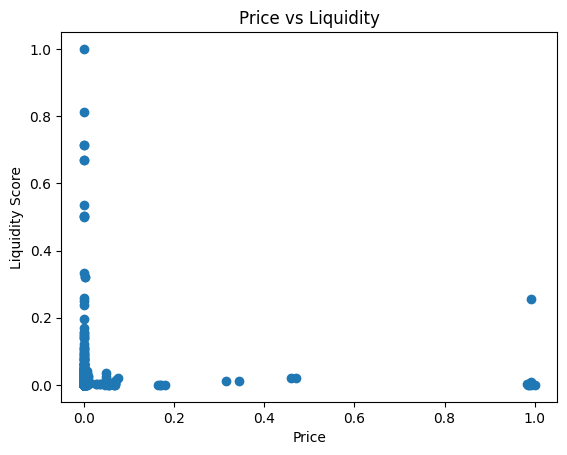

In [19]:
# Price vs Liquidity
plt.scatter(df['price'], df['liquidity_score'])
plt.xlabel("Price")
plt.ylabel("Liquidity Score")
plt.title("Price vs Liquidity")
plt.show()

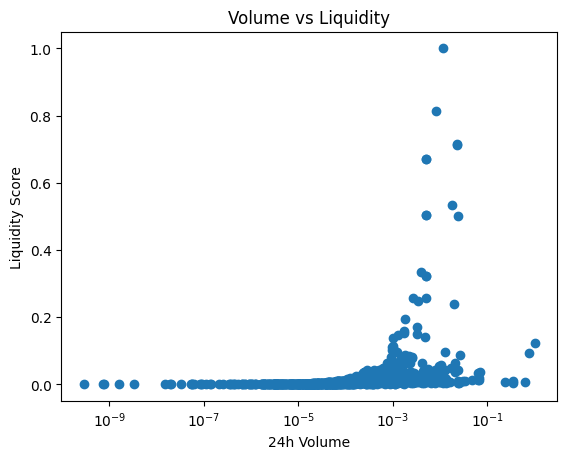

In [20]:
# Volume vs Liquidity
plt.scatter(df['24h_volume'], df['liquidity_score'])
plt.xlabel("24h Volume")
plt.ylabel("Liquidity Score")
plt.title("Volume vs Liquidity")
plt.xscale("log")
plt.show()

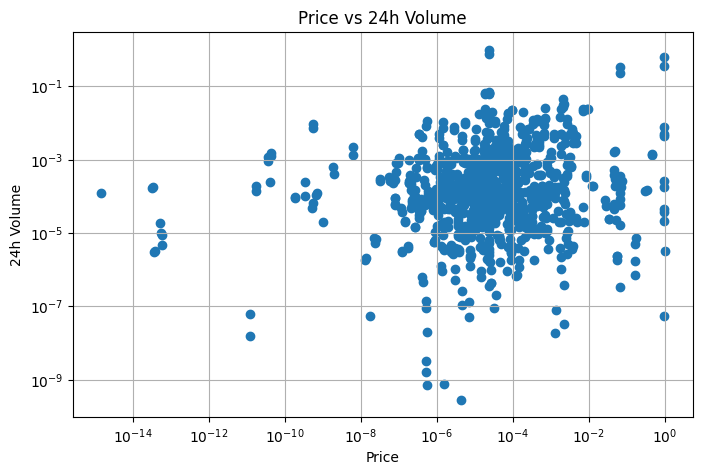

In [21]:
# price vs 24h volume
plt.figure(figsize=(8,5))
plt.scatter(df['price'], df['24h_volume'])
plt.xlabel("Price")
plt.ylabel("24h Volume")
plt.title("Price vs 24h Volume")
plt.xscale("log")  # optional: log scale for better visibility
plt.yscale("log")  # same for volume
plt.grid(True)
plt.show()

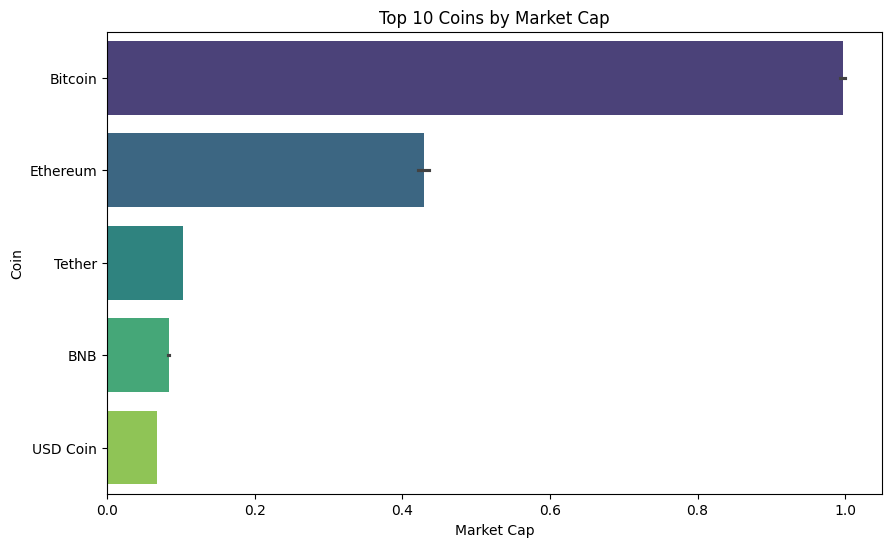

In [22]:
# Top 10 coins by market cap
top10 = df.sort_values(by='mkt_cap', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='mkt_cap', y='coin', data=top10, palette="viridis")
plt.title("Top 10 Coins by Market Cap")
plt.xlabel("Market Cap")
plt.ylabel("Coin")
plt.show()

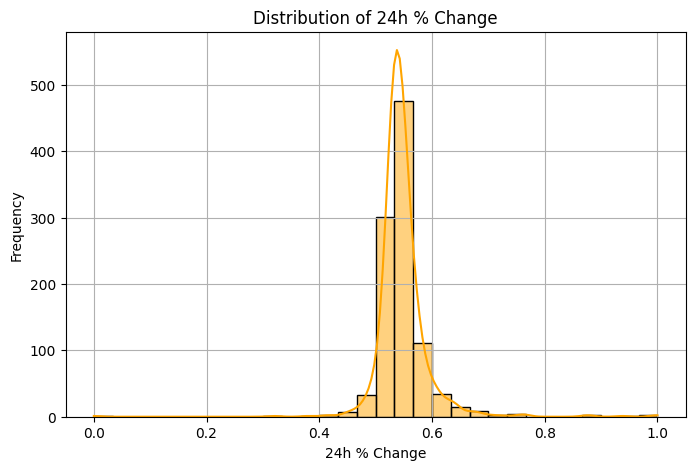

In [23]:
# 24h % Change Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['24h'], bins=30, kde=True, color='orange')
plt.title("Distribution of 24h % Change")
plt.xlabel("24h % Change")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()